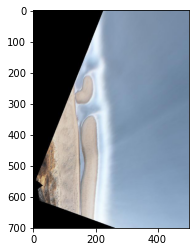

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KernelDensity
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

with open('1581508801.rectified.jpg','rb') as f:
    im = io.imread(f)
    
plt.imshow(im)


In [2]:
im_slic = seg.slic(im,n_segments=100,start_label=1,compactness=.1,enforce_connectivity=True)
im_felz = seg.felzenszwalb(im, scale=1000, sigma=0.8, min_size=20, multichannel=True)
im_quick = seg.quickshift(im, ratio=1.0, kernel_size=5, max_dist=10, return_tree=False, sigma=0, convert2lab=True, random_seed=42)
gradient = filters.sobel(color.rgb2gray(im))
im_watershed=segments_watershed = seg.watershed(gradient, markers=250, compactness=0.001)

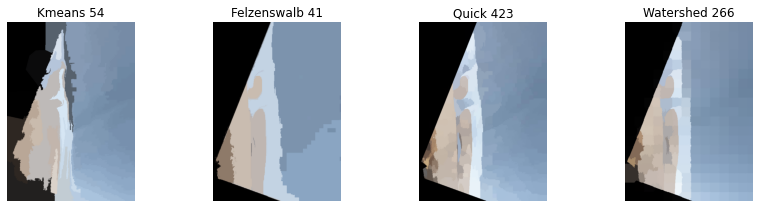

In [3]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=1, ncols=4, figsize=(12, 3),
                                    sharex=True, sharey=True)
for aa in (ax1, ax2, ax3, ax4):
    aa.set_axis_off()
ax1.imshow(color.label2rgb(im_slic, im, kind='avg',bg_label=0))
ax1.set_title('Kmeans {}'.format(np.max(im_slic)))
ax2.imshow(color.label2rgb(im_felz, im, kind='avg',bg_label=0))
ax2.set_title('Felzenswalb {}'.format(np.max(im_felz)))
ax3.imshow(color.label2rgb(im_quick, im, kind='avg',bg_label=0))
ax3.set_title('Quick {}'.format(np.max(im_quick)))
ax4.imshow(color.label2rgb(im_watershed, im, kind='avg',bg_label=0))
ax4.set_title('Watershed {}'.format(np.max(im_watershed)))

plt.tight_layout()
plt.show()


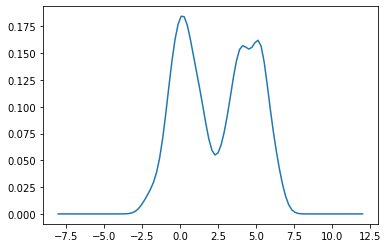

In [4]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(12345)
# similar to MATLAB ksdensity example x = [randn(30,1); 5+randn(30,1)];
Vecvalues=np.concatenate((np.random.normal(0,1,30), np.random.normal(5,1,30)))[:,None]
Vecpoints=np.linspace(-8,12,100)[:,None]
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(Vecvalues)
logkde = kde.score_samples(Vecpoints)
plt.plot(Vecpoints,np.exp(logkde))
plt.show()

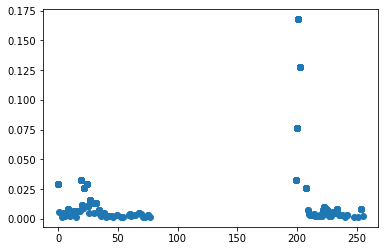

In [14]:
i = 500
pr = (im[i,:,0]-im[i,:,2]).reshape(-1,1)
kde = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(pr)
logkde = kde.score_samples(pr)
plt.plot(pr,np.exp(logkde),'o')
plt.show()

In [ ]:
print(np.shape(im[300,:,1].reshape(-1,1)))